In [49]:
import numpy as np
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
import torch 
import torchvision


## Zadanie 1

Wytrenuj sieć na danych  z pliku `reg_data_noise.npy`. 

In [51]:
data = np.load('reg_data_noise.npy')

In [52]:
xs = data[:,0]
ys = data[:,1]

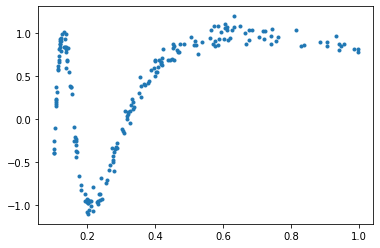

In [53]:
plt.plot(xs,ys,'.');

In [54]:
model = torch.nn.Sequential(torch.nn.Linear(1,5),
                    torch.nn.ReLU(), torch.nn.Linear(5,1))

In [55]:
t_xs = torch.from_numpy(xs).view(-1,1)
t_ys = torch.from_numpy(ys).view(-1,1)

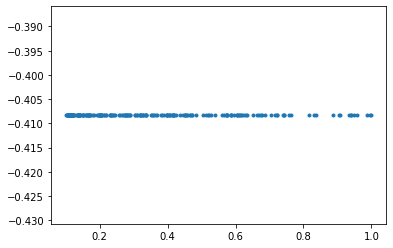

In [56]:
t_out = model(t_xs)

plt.plot(xs, t_out.data.view(-1).numpy(),'.')

In [57]:
dataset = torch.utils.data.TensorDataset(t_xs, t_ys)
(train_set, valid_set) = torch.utils.data.random_split(dataset,(160,40))

In [58]:
size = 30
print(size)
train_loader = torch.utils.data.DataLoader(train_set,batch_size=size,shuffle=True)

30


In [59]:
optimizer = torch.optim.SGD(model.parameters(),lr =0.00001)

In [60]:
loss_func = torch.nn.MSELoss()

In [61]:
%%time
err_train=[]
err_valid=[]
for epoch in range(10000):    
    for datum in train_loader:
        optimizer.zero_grad()
        (features,target) = datum
        pred = model(features)
        loss = loss_func(pred, target)
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        vpred  = model(valid_set[:][0])
        vloss  = loss_func(vpred,valid_set[:][1])
        err_valid.append(vloss)
        pred  = model(train_set[:][0])
        loss  = loss_func(pred,train_set[:][1])
        err_train.append(loss)
    if epoch%1000 == 0:
        print("epoch %d %f %f " % (epoch, loss, vloss))   

epoch 0 1.027214 0.904584 
epoch 1000 0.907797 0.793762 
epoch 2000 0.813753 0.707350 
epoch 3000 0.739740 0.640111 
epoch 4000 0.681631 0.587998 
epoch 5000 0.635919 0.547603 
epoch 6000 0.599976 0.516374 
epoch 7000 0.571665 0.492250 
epoch 8000 0.549372 0.473674 
epoch 9000 0.531832 0.459432 
Wall time: 46.9 s


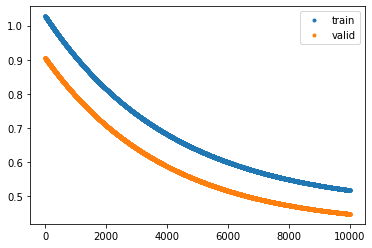

In [62]:
plt.plot(err_train, '.', label='train')
plt.plot(err_valid, '.', label='valid');
plt.legend()

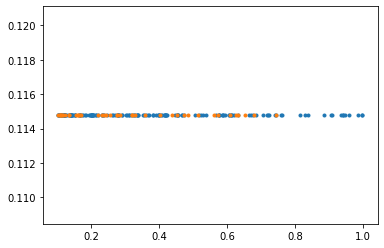

In [63]:
t_out_train = model(train_set[:][0])
plt.plot(train_set[:][0].data.numpy(), t_out_train.data.view(-1).numpy(),'.')
t_out_valid = model(valid_set[:][0])
plt.plot(valid_set[:][0].data.numpy(), t_out_valid.data.view(-1).numpy(),'.')

In [64]:
torch.save(model, "model.pt")